In [7]:
import segyio
from __future__ import print_function
import os
import sys
import time
from obspy.io.segy.segy import _read_segy, SEGYBinaryFileHeader
from obspy import read
import numpy as np

os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Only GPU 1 is visible to this code

In [8]:
filename = '/data/anyu/OPUNAKE3D-PR3461-FS.3D.Final_Stack.sgy'

# Read use _read_segy()

In [4]:
t0=time.time()
segy = _read_segy(filename)
print('--> data read in {:.1f} sec'.format(time.time()-t0))

--> data read in 366.7 sec


In [5]:
binary_file_header = segy.binary_file_header
print("\nbinary_file_header:\n", binary_file_header)

textual_file_header = segy.textual_file_header
print("\ntextual_file_header:\n", textual_file_header)

data_encoding=segy.data_encoding
print("\ndata_encoding:\n",data_encoding)
endian=segy.endian
print("\nendian:\n", endian)
file=segy.file
print("\nfile:\n", file)
classinfo = segy.__class__
print("\nclassinfo:\n", classinfo)
doc = segy.__doc__
print("\ndoc:\n", doc)
ntraces=len(segy.traces)
print("\nntraces:\n", ntraces)
size_M=segy.traces[0].data.nbytes/1024/1024.*ntraces
print("\nsize:\n\t", size_M,"MB")
print("\t", size_M/1024, "GB")


binary_file_header:
 Binary File Header:
	job_identification_number: 1
	line_number: 1987
	reel_number: 0
	number_of_data_traces_per_ensemble: 2240
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 4000
	sample_interval_in_microseconds_of_original_field_recording: 4000
	number_of_samples_per_data_trace: 1501
	number_of_samples_per_data_trace_for_original_field_recording: 1501
	data_sample_format_code: 1
	ensemble_fold: 2240
	trace_sorting_code: 4
	vertical_sum_code: 1
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

# Read use read()

In [11]:
t0=time.time()
print('sgy use read:')
stream = read(filename, format="SEGY")
print('--> data read in {:.1f} min'.format((time.time()-t0)/60))

sgy use read:
--> data read in 17.1 min


In [12]:
print(stream)

1666070 Trace(s) in Stream:

Seq. No. in line:    1 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:06.000000Z | 250.0 Hz, 1501 samples
...
(1666068 other traces)
...
Seq. No. in line: 1662034 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:06.000000Z | 250.0 Hz, 1501 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [27]:
i = 50
trace_i_header = stream[i].stats.segy.trace_header
# print(trace_i_header)
print(stream[i].stats)
print(trace_i_header.trace_sequence_number_within_segy_file)
print(trace_i_header.shotpoint_number)
leftbyte = trace_i_header.scalar_to_be_applied_to_the_shotpoint_number
rightbyte = trace_i_header.trace_value_measurement_unit
print(leftbyte)
print(rightbyte)

         network: 
         station: 
        location: 
         channel: 
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:00:06.000000Z
   sampling_rate: 250.0
           delta: 0.004
            npts: 1501
           calib: 1.0
         _format: SEGY
            segy: AttribDict({'trace_header': LazyTraceHeaderAttribDict({'unpacked_header': b"\x00\x00\x003\x00\x00\x07\xc4\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf2\xa7\x1c\x00\x00\x00\x19\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00F\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\xdd\x0f\xa0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [28]:
il=[]
xl=[]
for i in range(len(stream)):
    trace_i_header = stream[i].stats.segy.trace_header
    il.append(trace_i_header.shotpoint_number)
    xl.append(trace_i_header.trace_value_measurement_unit)
# print(il)
# print(xl)
    

In [30]:
ilines = np.unique(il)
print(ilines)
print(len(ilines))

[1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028
 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042
 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056
 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070
 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084
 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098
 2099 2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112
 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126
 2127 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140
 2141 2142 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153 2154
 2155 2156 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167 2168
 2169 2170 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181 2182
 2183 

In [31]:
xlines = np.unique(xl)
print(xlines)
print(len(xlines))

[2038 2040 2042 ... 6498 6500 6502]
2233


Output shows this is not a cube. use counter to see how many samples in each crossline or inline

In [32]:
from collections import Counter
t0=time.time()
counter = Counter(il)
print('Count in {:.1f} sec'.format(time.time()-t0))
print (sorted(counter.items()))

Count in 0.3 sec
[(1987, 26), (1988, 26), (1989, 1151), (1990, 1151), (1991, 1151), (1992, 1151), (1993, 1496), (1994, 1496), (1995, 1841), (1996, 1841), (1997, 1976), (1998, 1976), (1999, 2062), (2000, 2062), (2001, 2083), (2002, 2083), (2003, 2232), (2004, 2232), (2005, 2232), (2006, 2232), (2007, 2232), (2008, 2232), (2009, 2232), (2010, 2231), (2011, 2231), (2012, 2228), (2013, 2228), (2014, 2228), (2015, 2228), (2016, 2227), (2017, 2227), (2018, 2227), (2019, 2228), (2020, 2228), (2021, 2232), (2022, 2232), (2023, 2232), (2024, 2232), (2025, 2232), (2026, 2232), (2027, 2232), (2028, 2232), (2029, 2232), (2030, 2232), (2031, 2232), (2032, 2232), (2033, 2232), (2034, 2232), (2035, 2232), (2036, 2232), (2037, 2232), (2038, 2232), (2039, 2232), (2040, 2232), (2041, 2232), (2042, 2232), (2043, 2232), (2044, 2232), (2045, 2232), (2046, 2232), (2047, 2232), (2048, 2232), (2049, 2232), (2050, 2232), (2051, 2232), (2052, 2232), (2053, 2232), (2054, 2232), (2055, 2232), (2056, 2232), (2057,

In [35]:
seis_np = np.zeros((765,2233,1501))

In [42]:
int((2042-2038)/2)

2

In [43]:
t0=time.time()
for i in range(1666070): # total 1666070 traces in this dataset according to read() results shown above.
    tracei = stream[i]
    il=tracei.stats.segy.trace_header.shotpoint_number
    xl=tracei.stats.segy.trace_header.trace_value_measurement_unit
    yindex = int((xl-2038)/2)
#     print(yindex)
    seis_np[il-1987][yindex] = tracei.data
print('--> data write in {:.1f} min'.format((time.time()-t0)/60))

--> data write in 0.8 min


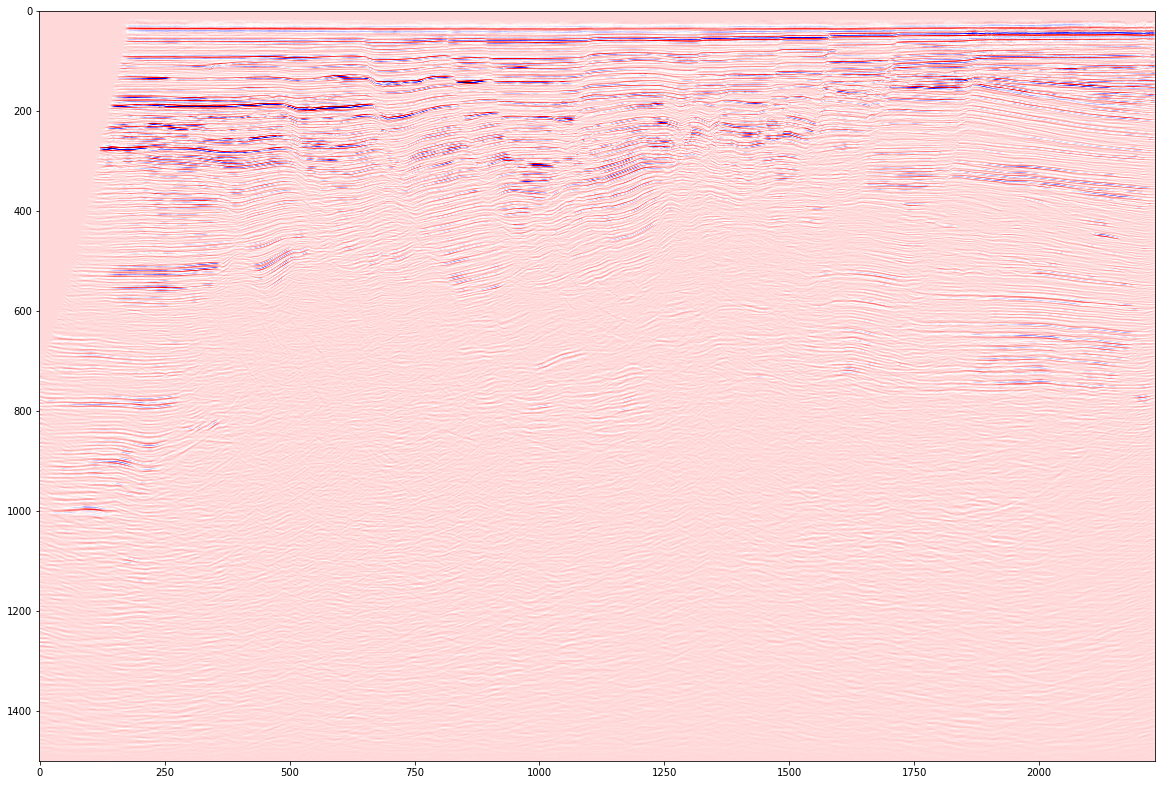

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))
plt.imshow(seis_np[313].transpose(), "gray") # inline 2300 plot as: https://wiki.seg.org/wiki/Opunake-3D

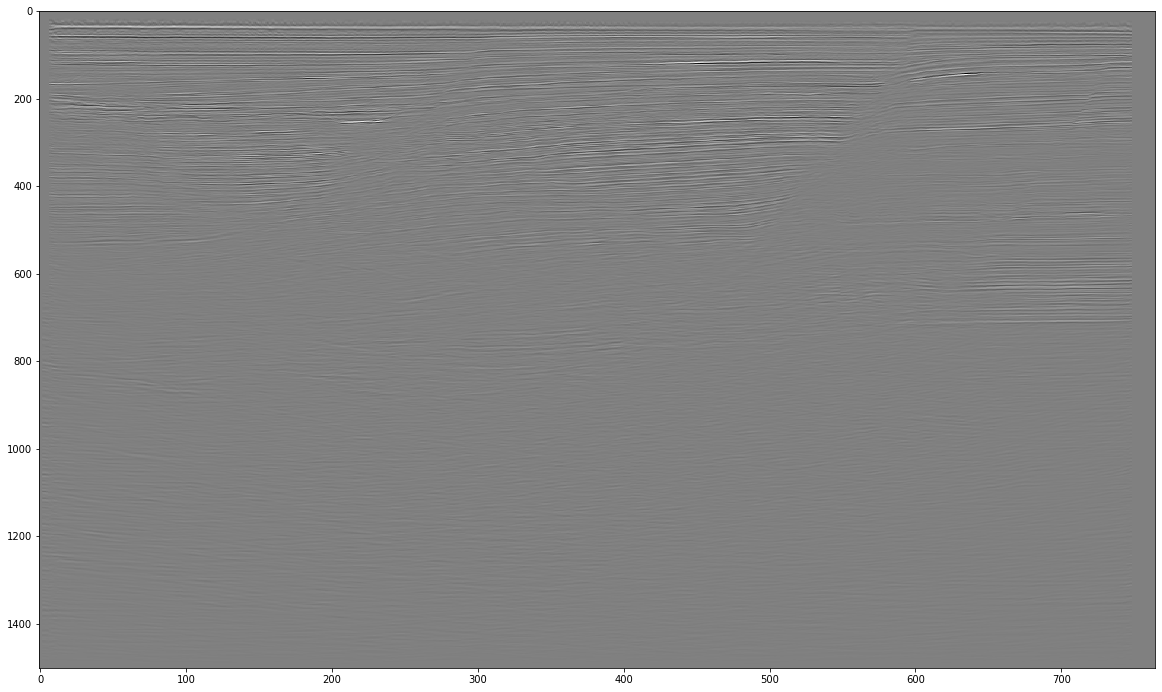

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))
plt.imshow(seis_np[:,1106,:].transpose(), "gray", aspect=0.3)

In [57]:
print(seis_np.shape)

(765, 2233, 1501)


In [58]:
t0=time.time()
print('sgy save as npz:')
np.savez("/data/anyu/opunake3d",seis_np)
print('--> data save in {:.1f} min'.format((time.time()-t0)/60))

sgy save as npz:
--> data save in 1.0 min
